In [8]:
%%capture
!pip install -U pymc3

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pymc3 as pm
import arviz as az
sns.set_context('paper')

# Flipping coin using PyMC3

$$ \theta \sim \mathcal{Beta}(2, 2)  $$
$$ y \sim \mathcal{Bern}(p=\theta)  $$

In [10]:
trials = 400
theta_real = 0.5 # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [11]:
with pm.Model() as our_first_model:
  θ = pm.Beta('θ', alpha=2., beta=2.)
  y = pm.Bernoulli('y', p=θ, observed=data)
  trace = pm.sample(1000, random_seed=123)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe92ead7dd8>,
      dtype=object)

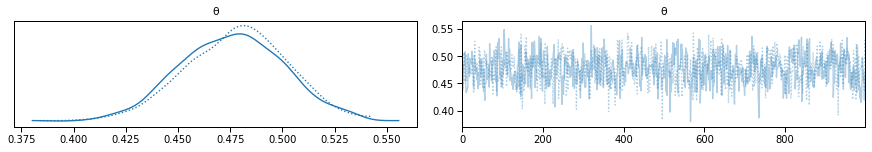

In [12]:
az.plot_trace(trace)

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


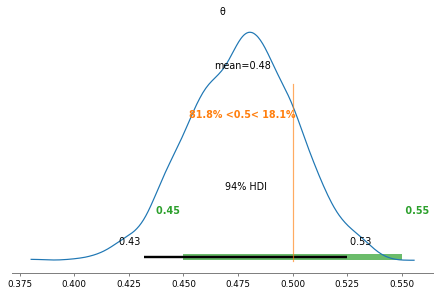

In [13]:
az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5)

In [14]:
az.summary(trace)

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.477,0.025,0.432,0.525,0.001,0.001,757.0,756.0,751.0,1547.0,1.0


# Normal distribution

$$ y \sim \mathcal{HalfNormal}(1)  $$
$$ \mu \sim \mathcal{N}(0, 1)  $$
$$ y \sim \mathcal{N}(\mu, \sigma)  $$


In [15]:
obs_y = np.random.normal(0.5, 0.35, 1000)

In [16]:
with pm.Model() as exercise1:

    sigma = pm.HalfNormal('sigma', sd=1.)
    mu = pm.Normal('mu', mu=0.0, sd=1.)

    y = pm.Normal('y', mu=mu, sd=sigma, observed=obs_y)

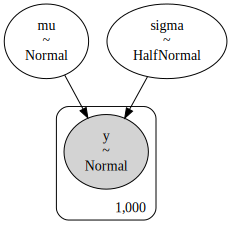

In [17]:
pm.model_to_graphviz(exercise1)

In [18]:
with exercise1:
    trace = pm.sample(1000)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


# Data visualization

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe939027278>,
      dtype=object)

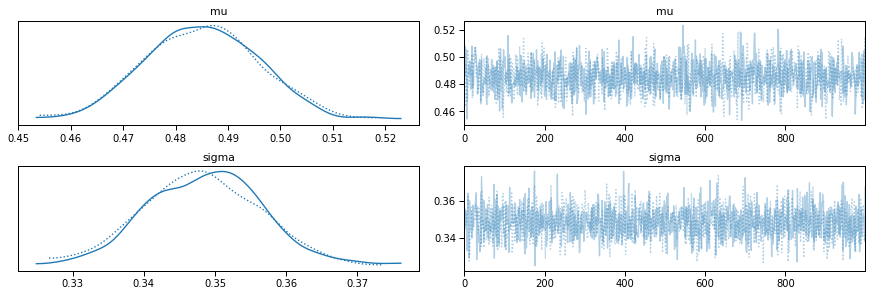

In [19]:
az.plot_trace(trace, var_names=("mu", "sigma"))

/usr/local/lib/python3.6/dist-packages/arviz/plots/jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe92847a9e8>,
      dtype=object)

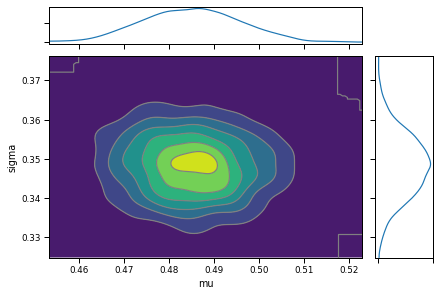

In [21]:
az.plot_joint(trace, kind='kde')

Get access to values

In [22]:
trace['mu']

array([0.47823554, 0.49216803, 0.50710324, ..., 0.48646012, 0.51446117,
       0.50639636])

# Posterior predictive checks

In [23]:
y_pred_g = pm.sample_posterior_predictive(trace, 100, exercise1)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [24]:
y_pred_g['y'].shape

(100, 1000)

posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


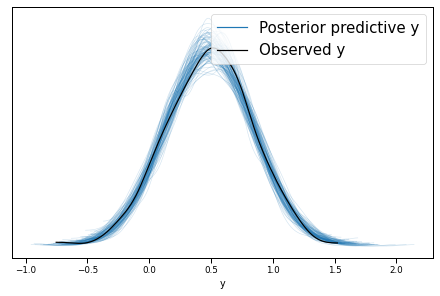

In [25]:
data_ppc = az.from_pymc3(trace=trace, posterior_predictive=y_pred_g, model=exercise1)
ax = az.plot_ppc(data_ppc, mean=False)
ax.legend(fontsize=15)